In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# VECM

## Johansen's five cases for estimation of VECM:

1. Unrestricted trend: Cointegrating equationsare trend stationary


2. Restricted trend: $\tau=0$
    - cointegrating equations are trend stationary, and trends in levels are linear but not quadratic
    
    
3. Unrestricted trend: $\tau=\rho=0$
    - cointegrating equations are stationary around constant means, linear trend in levels
    
    
4. Restricted trend: $\tau=\rho=\gamma=0$
    - cointegrating equations are stationary around constant means, no linear time trends in the data


5. No trend: $\tau=\rho=\gamma=\mu=0$
    - cointegrating equations, levels and differences of the data have means of zero

# L. Background notes
- Lambert

## L.1 Highly-persistent time series

$$x_t =x_{t-1}+\varepsilon_t \\
x_{t+h} = x_t + \varepsilon_{t+1}+\cdots+\varepsilon_{t+h}\\
E[x_{t+h}|x_t] = x_t$$

The above is not weakly dependent, thus we cannot use CLM or LLN

- I(1) is highly persistent process, and we take the first difference that is not highly persistent.
- I(0) is already weakly dependent

## L.2 Testing for cointegration

$$y_t - \beta x_t=\varepsilon_t$$

If there is a relationship between $y_t$ and $x_t$ then $\varepsilon_t$ should be stationary I(0) & weakly dependent

- But we don't know the parameter $\beta$

- Thus we need to run least squares:

$$y_t=\hat\alpha +\hat\beta x_t +\hat u_t\\
\hat u_t = y_t-\alpha-\beta x_t$$

If $y_t$ and $x_t$ are I(1) then $\hat u_t$ should be an I(0) process.


--- 
**We check this by running a DF test on $\hat u_t$**



$\Delta \hat u_t = \delta_0 + \delta_1 \hat u_{t-1}+\cdots + v_t$

- Calculate T-stat for $\delta_1$ then compare to DF distribution
- If T< DF is less than critical value of DF, we reject null and conclude that our error is I(0)
- In other words if we reject the null we have cointegration between our variables

- Because the T stat is for $\hat\beta$ rather than the true $\beta$, we have to ammend the DF distribution because we are estimating $\beta$.
-  This DF (lets denote as $DF_2$, where our original is $DF_1$) is slightly more stringent than the original DF.
    - $t<DF_2<DF_1$
- This makes it less likely we reject the null hypothesis which we write below:

$
H_0: \beta=0\\
H_1: \beta\neq0$

- The null is that we have run a spurious regression 
- If $\beta$ is zero it means $y_t$ and $x_t$ are not integrated
- It is only under the case that we reject the null that we potentially have co-integration

## L.2.1 Example: RW drift

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


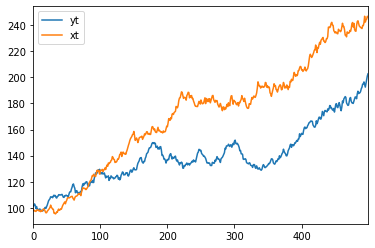

In [3]:
rwdrift1 = 100 * np.cumprod(np.random.normal(loc=.001, scale=.01, size=500) + 1)
plt.plot(rwdrift1, label= 'yt')
rwdrift2 = 100 * np.cumprod(np.random.normal(loc=.002, scale=.01, size=500) + 1)
plt.plot(rwdrift2,label= 'xt')
plt.legend()
plt.margins(x=0)
plt.savefig('/Users/corybaird/Desktop/RW_drift.eps', format='eps', bbox_inches='tight')
plt.show()

### L.2.1.1 Regress without constant

In [4]:
y = rwdrift1
x = rwdrift2
result = sm.OLS(y, x).fit()
b = result.params[0]
test = (y-(b*x))
adf_stats = adfuller(test.ravel())
if adf_stats[1]<0.05:
    print("The p-value for the ADF test is: {:.3f}".format(adf_stats[1]))
    print('Reject the null of spurious regression')
else:
    print("The p-value for the ADF test is: {:.3f}".format(adf_stats[1]))
    print('Cannot reject the null of spurious regression')
    print('Thus we have evidence of spurious regression')

The p-value for the ADF test is: 0.385
Cannot reject the null of spurious regression
Thus we have evidence of spurious regression


### L2.1.2 Regress with constant

In [5]:
xc = sm.add_constant(rwdrift2)
result = sm.OLS(y, xc).fit()
b = result.params
test = y-xc@b
adf_stats = adfuller(test.ravel())
if adf_stats[1]<0.05:
    print("The p-value for the ADF test is: {:.3f}".format(adf_stats[1]))
    print('Reject the null of spurious regression')
else:
    print("The p-value for the ADF test is: {:.3f}".format(adf_stats[1]))
    print('Cannot reject the null of spurious regression')
    print('Thus we have evidence of spurious regression')

The p-value for the ADF test is: 0.618
Cannot reject the null of spurious regression
Thus we have evidence of spurious regression


## L.3 Error correction model

$$y_t =  c +\delta_1x_t+\delta_2x_{t-1}+\mu y_{t-1}+v_t\\
y_t-y_{t-1}=c + \delta_1x_t+\delta_2x_{t-1} -(1-\mu) y_{t-1}+v_t\\
\Delta y_t= c + \delta_1x_t+\delta_2x_{t-1} -(1-\mu) y_{t-1}+v_t\\
\Delta y_t = c+\delta_1 \Delta x_t - \lambda(y_{t-1}-\alpha-\beta x_{t-1})+v_t
$$

Where:
- $\lambda =1-\mu$
- $\beta = \frac{\delta_1+\delta_2}{1-\mu}$


- If $y_t, x_t = I(1) \Rightarrow \Delta y_t ,\Delta y_t= I(0)$
- If long run relationship exists between y and x exists then $\lambda(y_{t-1}-\alpha-\beta x_{t-1})$ will be co-integrated and the term will be I(0)



- Imagine that $y_{t-1}>\lambda(y_{t-1}-\alpha-\beta x_{t-1})$. 
    - Then it is above equilibrium value, and the change in $\Delta y_t$ will be slightly negative "correcting" the model
 
### Error correction model pt. 2

$$\Delta y_t = \delta_0 + \sum^{p}_{i=0} \delta_i \Delta x_{t-i} + \sum_{j=1}^{k}\mu_j \Delta y_{t-j}-\lambda(y_{t-1}-\delta-\beta x_{t-1})+\varepsilon_t$$

- The summations represent the short term dynamics of the model with i and j lags.
- The $\lambda$ term is long run dynamics


#### We can estimate $\alpha, \beta$ using least squares

$$\Delta y_t = \delta_0 + \sum^{p}_{i=0} \delta_i \Delta x_{t-i} + \sum_{j=1}^{k}\mu_j \Delta y_{t-j}+\gamma_0 \hat{v_t}\\
\hat\lambda = -\hat\gamma_0\\
0<\lambda<1$$

- The reason $\lambda$ is less then 1 is because we don't want the variable to fully adust to the dis-equilibrium.
    - Ex: $\lambda=.5$ means that it steps half of the way towards equilibrium assuming there are no other short-run dynamics

If $y_t> y^{\text{Equilibrium}}$ then there is negative change in y